In [106]:
# import
import statsmodels.api as sm
import re
import pandas as pd
import numpy as np

import email
from email.parser import Parser

import matplotlib.pyplot as plt

import unicodedata

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import acquire
from prepare import basic_clean, tokenize, stem, lemmatize, remove_stopwords

import warnings
warnings.filterwarnings('ignore')

# Explore

In [2]:
df_new = pd.read_csv('all')

In [3]:
df_new.head()

,Unnamed: 0,date,content,clean,stemmed,lemmatized
0,0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,forecast,forecast,forecast
1,1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel busi meet take fun trip especi prepar p...,traveling business meeting take fun trip espec...
2,2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way go,test success way go,test successful way go
3,3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,randi send schedul salari level everyon schedu...,randy send schedule salary level everyone sche...
4,4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145


In [4]:
# dropping Unnamed: 0

df_new = df_new.drop(columns = 'Unnamed: 0')

In [5]:
df_new.head()

,date,content,clean,stemmed,lemmatized
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,forecast,forecast,forecast
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel busi meet take fun trip especi prepar p...,traveling business meeting take fun trip espec...
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way go,test success way go,test successful way go
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,randi send schedul salari level everyon schedu...,randy send schedule salary level everyone sche...
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145


In [6]:
# Checking for NAN
df_new.isna().sum()

date            0
content         0
clean         287
stemmed       277
lemmatized    293
dtype: int64

In [7]:
# droping NAN for lemmatized
df_new = df_new.dropna()

In [8]:
# rechecking if the above code works
df_new.isna().sum()

date          0
content       0
clean         0
stemmed       0
lemmatized    0
dtype: int64

In [9]:
df_new.head()

,date,content,clean,stemmed,lemmatized
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,forecast,forecast,forecast
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel busi meet take fun trip especi prepar p...,traveling business meeting take fun trip espec...
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way go,test success way go,test successful way go
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,randi send schedul salari level everyon schedu...,randy send schedule salary level everyone sche...
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145


In [10]:
import nltk.sentiment
sia = nltk.sentiment.SentimentIntensityAnalyzer()
df_new['sentiment'] = df_new.lemmatized.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df_new.head()

,date,content,clean,stemmed,lemmatized,sentiment
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,forecast,forecast,forecast,0.0000
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel busi meet take fun trip especi prepar p...,traveling business meeting take fun trip espec...,0.9313
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way go,test success way go,test successful way go,0.5859
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,randi send schedul salari level everyon schedu...,randy send schedule salary level everyone sche...,0.0000
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400


In [11]:
df_new.to_csv('all_sentiment.csv')

In [ ]:
# Keeping date and sentiment in DataFrame

In [16]:
df_date = df_new["date"]

In [17]:
df_sent = df_new["sentiment"]

In [19]:
df_date_sent = [df_date, df_sent]

In [21]:
headers = ['date', 'sentiment']

In [24]:
df_combined = pd.concat(df_date_sent, axis =1, keys = headers)

In [25]:
df_combined.head()

,date,sentiment
0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",0.0000
1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",0.9313
2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",0.5859
3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",0.0000
4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",-0.3400


In [26]:
# change date column to datetime format
df_combined.date = pd.to_datetime(df_combined.date, utc=True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517108 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   date       517108 non-null  datetime64[ns, UTC]
 1   sentiment  517108 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 11.8 MB


In [28]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517108 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   date       517108 non-null  datetime64[ns, UTC]
 1   sentiment  517108 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 11.8 MB


In [32]:
# setting and sorting date
df_combined = df_combined.set_index('date').sort_index()
df_combined

,sentiment
date,
1980-01-01 00:00:00+00:00,0.9972
1980-01-01 00:00:00+00:00,0.9584
1980-01-01 00:00:00+00:00,0.9735
1980-01-01 00:00:00+00:00,0.8662
1980-01-01 00:00:00+00:00,0.8662
...,...
2024-05-26 10:49:57+00:00,0.9313
2043-12-28 19:34:12+00:00,0.5719
2044-01-02 23:46:00+00:00,0.3182


In [33]:
# Looking for start and end of our data
df_combined.index.min(), df_combined.index.max()

(Timestamp('1980-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2044-01-04 22:48:58+0000', tz='UTC'))

In [37]:
df_combined['year'] = df_combined.index.year
df_combined['month'] = df_combined.index.month
df_combined['day'] = df_combined.index.day
df_combined.head()

,sentiment,year,month,day
date,,,,
1980-01-01 00:00:00+00:00,0.9972,1980,1,1
1980-01-01 00:00:00+00:00,0.9584,1980,1,1
1980-01-01 00:00:00+00:00,0.9735,1980,1,1
1980-01-01 00:00:00+00:00,0.8662,1980,1,1
1980-01-01 00:00:00+00:00,0.8662,1980,1,1


In [39]:
# Neutral Scores
df_combined[df_combined.sentiment == 0].count()

sentiment    47018
year         47018
month        47018
day          47018
dtype: int64

In [40]:
# Positive Scores
df_combined[df_combined.sentiment > 0].count()

sentiment    440266
year         440266
month        440266
day          440266
dtype: int64

In [41]:
# Negative Scores
df_combined[df_combined.sentiment < 0].count()

sentiment    29824
year         29824
month        29824
day          29824
dtype: int64

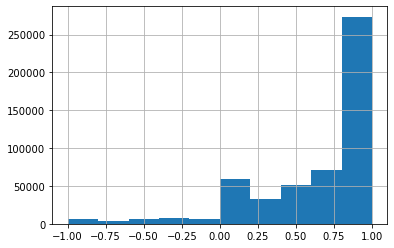

In [52]:
# Sentiment score in histogram
df_combined.sentiment.hist(bins = 10)
plt.show()

### Percentage Based

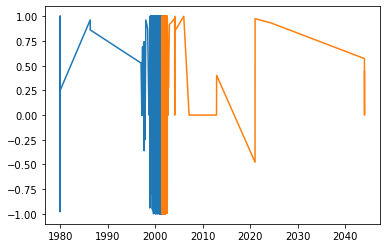

In [54]:
train_size = .70
n = df_combined.shape[0]
test_start_index = round(train_size * n)

train = df_combined[:test_start_index] # everything up (not including) to the test_start_index
test = df_combined[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sentiment)
plt.plot(test.index, test.sentiment)

### Human Based

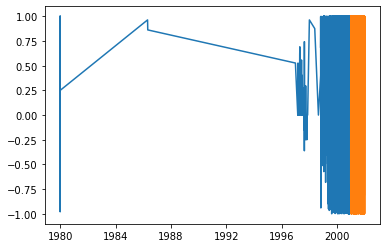

In [60]:
train = df_combined[:'2000'] # includes 2000
test = df_combined['2001']

plt.plot(train.index, train.sentiment)
plt.plot(test.index, test.sentiment)

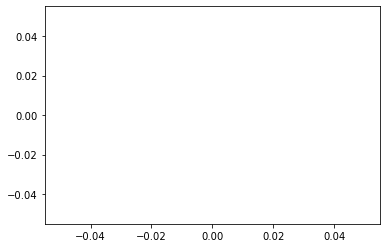

In [59]:
plt.plot(test.index, test.sentiment)

# Visualizations

In [61]:
y = train.sentiment
y.head()

date
1980-01-01 00:00:00+00:00    0.9972
1980-01-01 00:00:00+00:00    0.9584
1980-01-01 00:00:00+00:00    0.9735
1980-01-01 00:00:00+00:00    0.8662
1980-01-01 00:00:00+00:00    0.8662
Name: sentiment, dtype: float64

<AxesSubplot:>

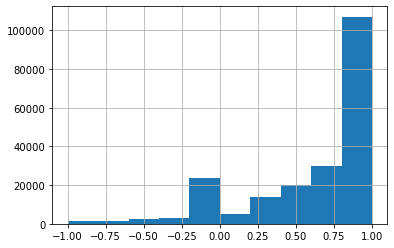

In [62]:
y.hist()

<AxesSubplot:ylabel='Frequency'>

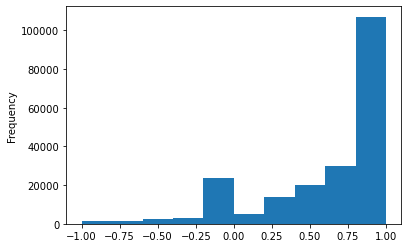

In [63]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Sentiment Score by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sentiment Score')]

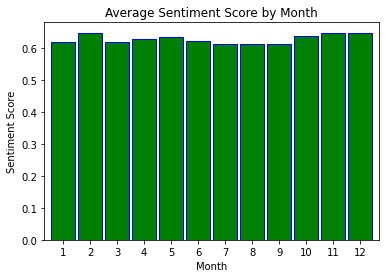

In [69]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='blue', color = 'green')
plt.xticks(rotation=0)
ax.set(title='Average Sentiment Score by Month', xlabel='Month', ylabel='Sentiment Score')

[Text(0.5, 1.0, 'Average Sentiment Score by Weekday'),
 Text(0.5, 0, 'Weekday'),
 Text(0, 0.5, 'Sentiment Score')]

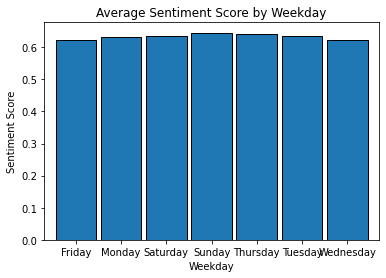

In [72]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sentiment Score by Weekday', xlabel='Weekday', ylabel='Sentiment Score')

<AxesSubplot:xlabel='date'>

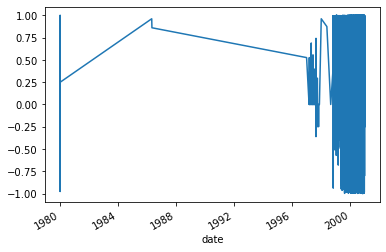

In [78]:
y.plot()

<AxesSubplot:title={'center':'6 hour average'}, xlabel='date'>

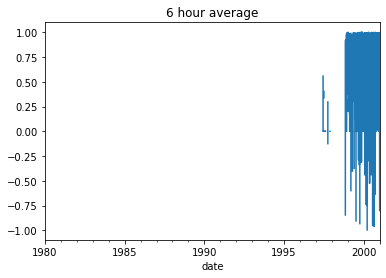

In [87]:
# resample monthly
y.resample('6H').mean().plot(title='6 hour average')

<AxesSubplot:title={'center':'2 week average'}, xlabel='date'>

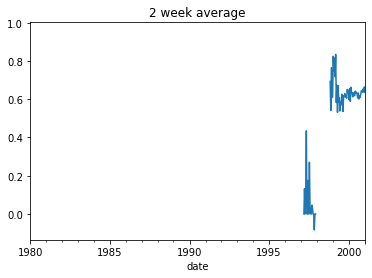

In [88]:
# resample biweekly
y.resample('2W').mean().plot(title='2 week average')

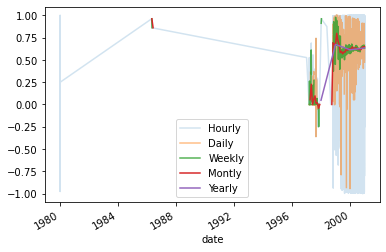

In [89]:
# Combining Visualization
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

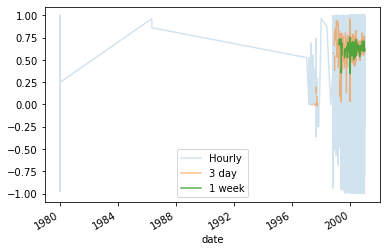

In [90]:
# In addition to resampling, we can calculate moving averages with the .rolling method.
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in temperature'}, xlabel='date'>

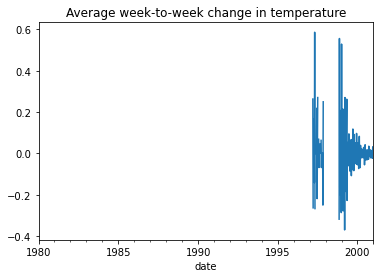

In [91]:
# Visualizing weekly change over time
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')


<AxesSubplot:title={'center':'Average month-to-month change in temperature'}, xlabel='date'>

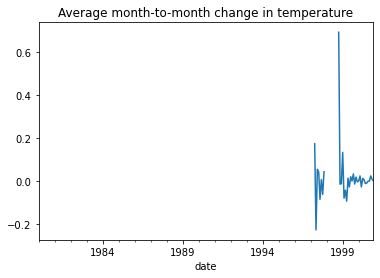

In [92]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

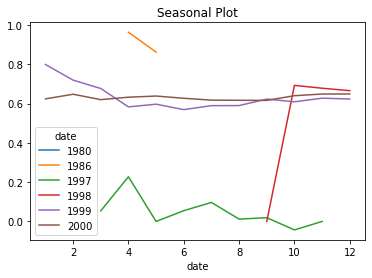

In [93]:
### Seasonal Plot
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

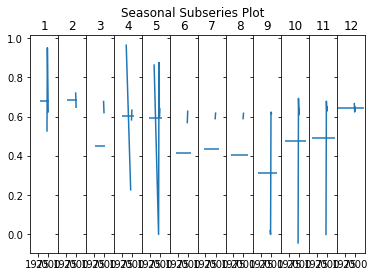

In [94]:
# Seasonal Subquery Plot
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


Text(0.5, 1.0, 'Lag plot with lag=1')

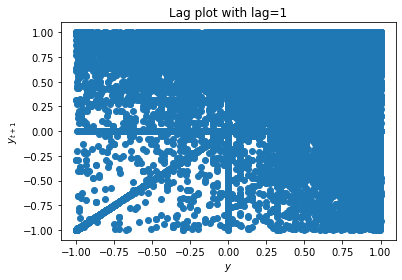

In [95]:
# Lag Plot
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

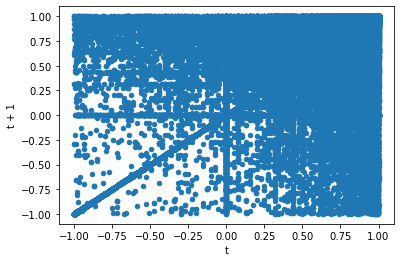

In [97]:
train['y(t + 1)'] = train.sentiment.shift(-1)
ax = train.plot.scatter(x='sentiment', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')


,this_week,year,month,day,y(t + 1),the_next_week
date,,,,,,
1980-01-06 00:00:00+00:00,0.499981,1980.0,1.000000,1.000000,0.499914,NaN
1980-01-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2000-12-03 00:00:00+00:00,0.640117,2000.0,11.214993,22.673698,0.640128,0.634935
2000-12-10 00:00:00+00:00,0.634935,2000.0,12.000000,6.144721,0.634937,0.666839
2000-12-17 00:00:00+00:00,0.666839,2000.0,12.000000,12.621681,0.666780,0.658655


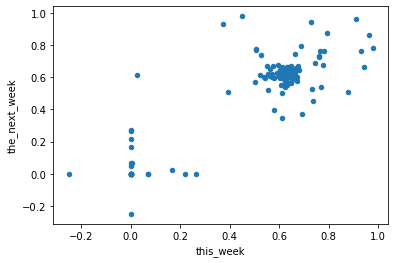

In [98]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sentiment.shift(-1)
weekly = weekly.rename(columns={'sentiment': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly


,this_week,year,month,day,y(t + 1),12_weeks_out
date,,,,,,
1980-01-06 00:00:00+00:00,0.499981,1980.0,1.000000,1.000000,0.499914,NaN
1980-01-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2000-12-03 00:00:00+00:00,0.640117,2000.0,11.214993,22.673698,0.640128,NaN
2000-12-10 00:00:00+00:00,0.634935,2000.0,12.000000,6.144721,0.634937,NaN
2000-12-17 00:00:00+00:00,0.666839,2000.0,12.000000,12.621681,0.666780,NaN


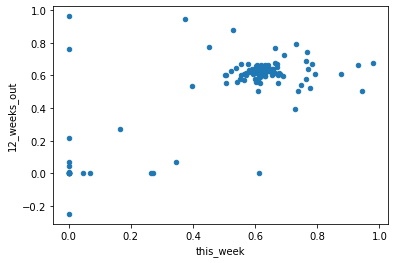

In [100]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sentiment.shift(-12)
weekly = weekly.rename(columns={'sentiment': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

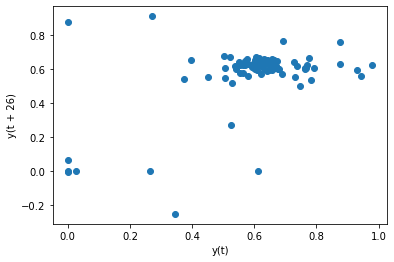

In [102]:
pd.plotting.lag_plot(train.sentiment.resample('W').mean(), lag=26)


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

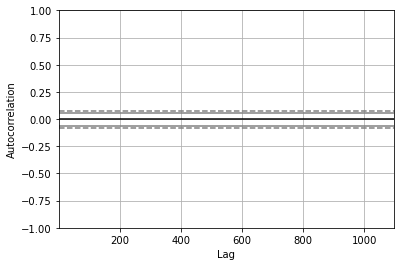

In [104]:
# Autocorrelation Plot
pd.plotting.autocorrelation_plot(train.sentiment.resample('W').mean())


In [113]:
df_combined.tail(100)

,sentiment,year,month,day
date,,,,
2002-07-12 10:33:00+00:00,0.9477,2002,7,12
2002-07-12 10:33:00+00:00,0.9477,2002,7,12
2002-07-12 10:33:00+00:00,0.9477,2002,7,12
2002-07-12 11:07:00+00:00,0.9652,2002,7,12
2002-07-12 11:07:00+00:00,0.9652,2002,7,12
...,...,...,...,...
2024-05-26 10:49:57+00:00,0.9313,2024,5,26
2043-12-28 19:34:12+00:00,0.5719,2043,12,28
2044-01-02 23:46:00+00:00,0.3182,2044,1,2


In [115]:
# years beyond 2002? why is 2044 and 2020 there?
df_combined[df_combined.year > 2002].year

date
2004-02-03 23:39:00+00:00    2004
2004-02-03 23:52:26+00:00    2004
2004-02-03 23:52:39+00:00    2004
2004-02-04 00:39:33+00:00    2004
2004-02-04 00:43:10+00:00    2004
                             ... 
2024-05-26 10:49:57+00:00    2024
2043-12-28 19:34:12+00:00    2043
2044-01-02 23:46:00+00:00    2044
2044-01-04 16:59:46+00:00    2044
2044-01-04 22:48:58+00:00    2044
Name: year, Length: 81, dtype: int64

In [117]:
df_combined[df_combined.year > 2022].year

date
2024-05-26 10:49:57+00:00    2024
2043-12-28 19:34:12+00:00    2043
2044-01-02 23:46:00+00:00    2044
2044-01-04 16:59:46+00:00    2044
2044-01-04 22:48:58+00:00    2044
Name: year, dtype: int64

In [118]:
#removing all the emails after 2022 which is not possible
df_combined = df_combined[df_combined.year < 2022]

In [119]:
df_combined.shape

(517103, 4)

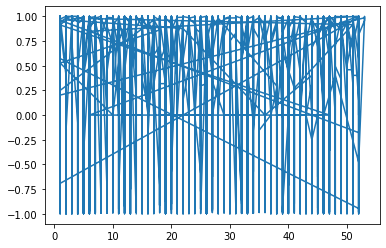

In [121]:
# Exploring the data
plt.plot(df_combined.index.week, df_combined.sentiment)

In [126]:
# Human splitting
train = df_combined[:'2000'] 
test = df_combined['2001']

<AxesSubplot:xlabel='date'>

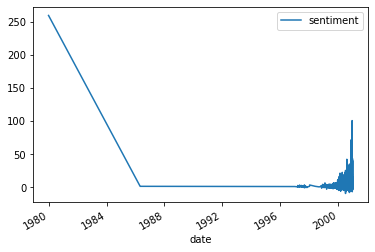

In [127]:
by_date = train.groupby(['date']).sentiment.sum().reset_index()
#using train data
by_date.plot(x = 'date', y = 'sentiment')

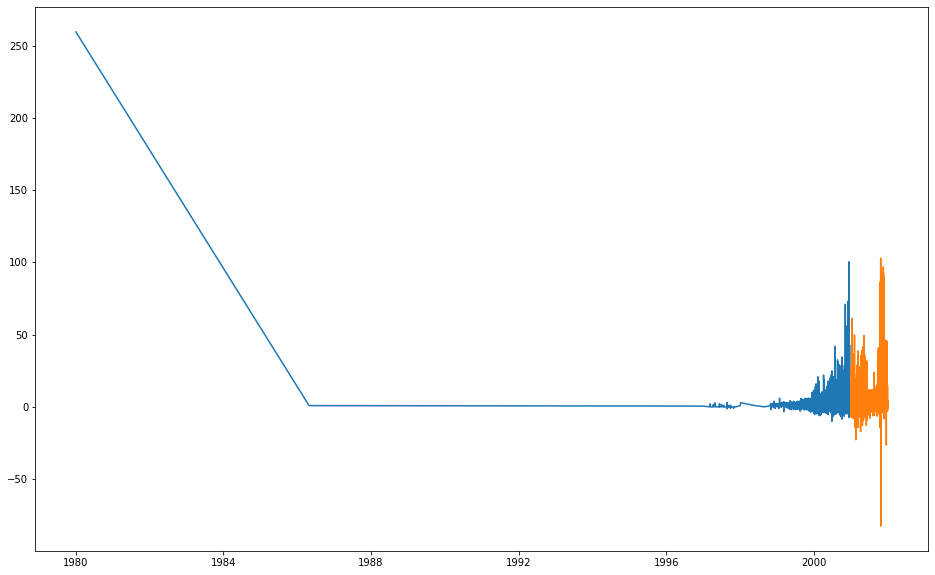

In [128]:
# Looking train and test set
train_by_date = train.groupby(['date']).sentiment.sum().reset_index()
#train_by_date.plot(x = 'date', y = 'sentiment')


test_by_date = test.groupby(['date']).sentiment.sum().reset_index()
#test_by_date.plot(x = 'date', y = 'sentiment')

plt.figure(figsize = (16, 10))
plt.plot(train_by_date.date, train_by_date.sentiment)
plt.plot(test_by_date.date, test_by_date.sentiment)
plt.show()

In [ ]:
# It looks like data of interest will be from year 1997 and up

# Hypothesis